In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Let's do some Machine Learning!**

# ✏️ TASK 1 - LOAD DATASET
- Download the **california housing dataset** from sklearn.
- Show the data as a **pandas dataframe**. Have a look on the columns.
- What's the **target** value of the dataset? Add it to the dataframe above.

<details>
  <summary>❔</summary> 

  - After you downloaded the dataset with <code>fetch_california_housing()</code> you can use <code>.keys()</code> to show all possible attributes of the downloaded object (including *DESCR*, *feature_names*, ...). </br>
  - Column *MedInc* describes the median income in 10,000$. Column *MedHouseVal* describes the median house value in 100,000$. You may want to convert those values by using python's <code>apply</code> method.
</details>

# ✏️ TASK 2 - UNDERSTAND THE DATA
- Have a look at the data. What do the **columns** mean? What about the values and datatypes?
- How are the **values** distributed? (Min, Max, Mean)
- How do features correlate to each other? Try to create a **correlation matrix**. Does the correlation matrix show any relations?

<details>
  <summary>❔</summary> 
    1) To create a correlation matrix you can use the method <code>.corr()</code> on a pandas dataframe. You can visualize the matrix by putting it into a seaborn heatmap <code>sns.heatmap()</code>
</details>

# ✏️ TASK 3 - VISUALIZATION
Let's do some nice pictures, to gain deeper understanding of the data:
- Visualize the distribution of the target variable *MedHouseVal* by creating a histogram.
- Visualize geographic distribution: Create a scatterplot with Longitude as x values and Latitude as y values. Colour sample points depending on their *MedHouseVal*.

<details>
  <summary>❔</summary> 

  - You can easily create a histogram by using [seaborn's histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html): <code>sns.histplot()</code>.
  - Use [seaborn's scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) <code>sns.scatterplot(data=, x=, y=, hue=)</code>.
    
</details>


### ✏️ Subtask - Pair Plot
Pair plots are used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. 

Have a look at the pairplot below. Can you draw any conclusions? Which feature might be a good one to use for prediction?

In [30]:
# Reduce the dataset to a smaller subset (otherwise creation of pairplot would take too long)
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = df.drop(columns_drop, axis=1)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

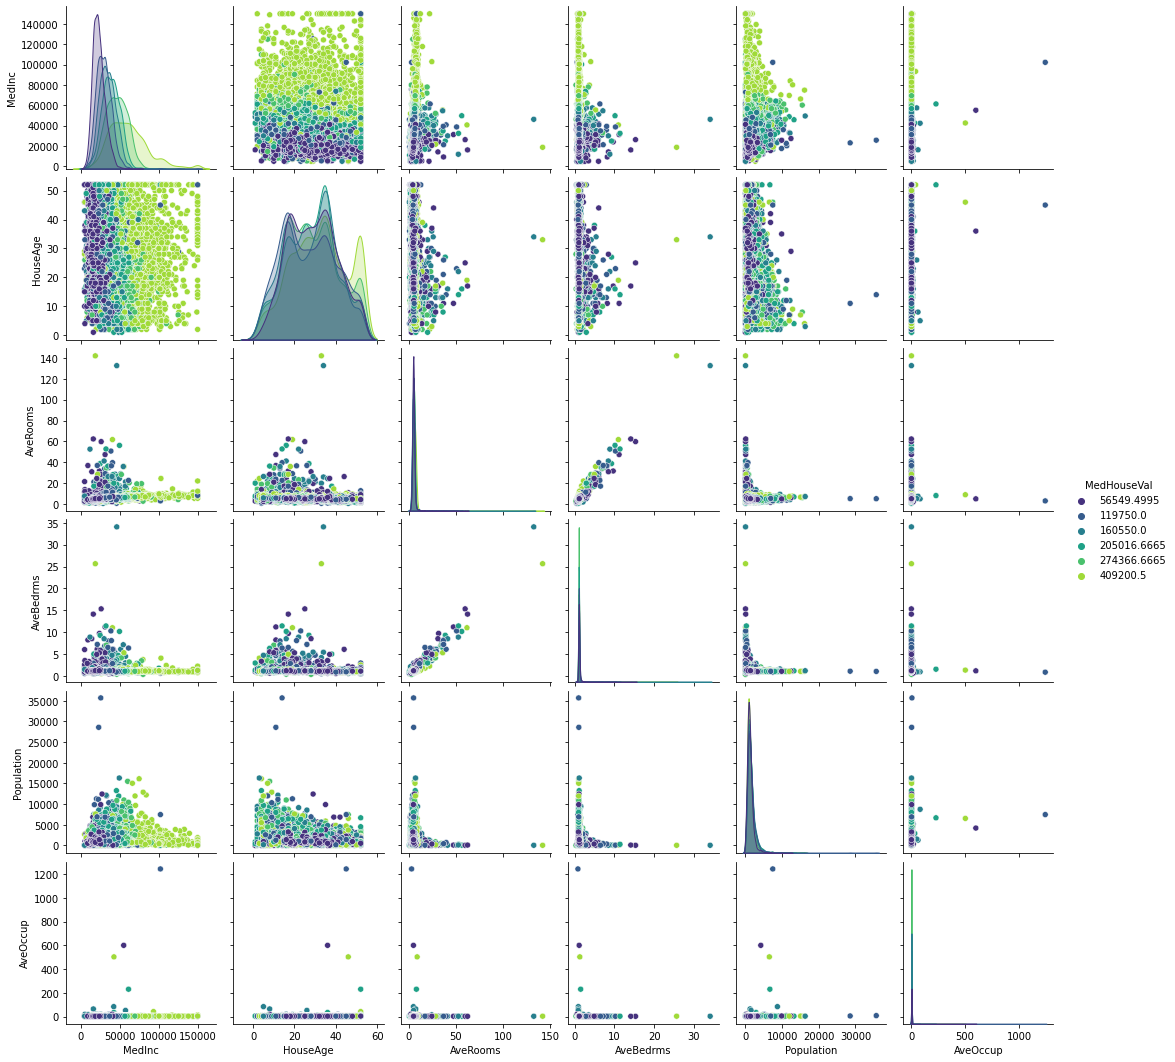

In [31]:
sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

# ✏️ TASK 4 - MACHINE LEARNING MODELL
- First split the dataset into train and test data by using [sklearn's train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Create a simple machine learning modell by using [sklearn's Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). **Fit** the model with the training data and **predict** the test data. 
- Evaluate performance by computing the [mean absolute error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html).
- Try the same with a second machine learning modell: [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). Compare the results. For which method do you decide?

# ✏️ TASK 5 - FINETUNING
Up to now we put all available features into the modell. Often modells show better results with less features. It is crucial to find the best combination of features. 

Select **different combinations of features**. Like above, create a RandomForestRegressor, fit and predict. Analyse the mean absolute error. Try different combinations of features. Maybe the pairplot from task 3 or the correlation matrix give you some inspiration on which feature combinations to try. **What's the best one** in the end?

# ✏️ TASK 6 - FINAL MODEL
- First, select features you have chosen in task 5.
- Then, create model and train it with whole data (do NOT split into train/test).
- Export model to .joblib-file and store it in folder [artifacts](../artefacts/).

<details>
  <summary>❔</summary>
  
  - Export to .joblib-file with <code>joblib.dump(model, '..artefacts/model.joblib')</code>.
</details>